This is a Jupyter notebook for NN to study the CEF problem

In [1]:
import pandas as pd
CEF_data=pd.read_csv('CEF.csv').dropna()
X,y = CEF_data[['E3','E5','E7','E9','s1','s2','s3','s4']].values, CEF_data[['C20','C40','C60','C44','C64']].values
X=X/150
y=y/1000
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)


predictions=model.predict([[12.96,25.19,44.36,86.51,0.40,1.00,0.24,0.041]])

!pip install --upgrade tensorflow

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.4.0
TensorFlow version: 2.4.1


In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_text = y_test.astype('float32')

In [4]:
y_train

array([[-0.395, -0.516,  0.089, -1.   , -1.   ],
       [ 0.299,  0.197,  0.862, -0.601, -0.069],
       [-0.05 ,  0.1  , -0.5  , -0.425, -0.5  ],
       ...,
       [-0.35 , -0.05 , -0.125, -0.275,  0.4  ],
       [-0.45 ,  0.1  , -0.45 , -0.45 ,  0.4  ],
       [ 0.964,  0.197,  0.33 , -0.468,  0.729]], dtype=float32)

In [10]:
model = Sequential()
hl = 512
model.add(Dense(hl, input_dim = 8, activation ='tanh'))
model.add(Dense(hl, input_dim = hl, activation = 'tanh'))
model.add(Dense(hl, input_dim = hl, activation = 'tanh'))
model.add(Dense(hl, input_dim = hl, activation = 'tanh'))
model.add(Dense(hl, input_dim = hl, activation = 'tanh'))
model.add(Dense(5, input_dim=hl))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               4608      
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 2565      
Total params: 1,057,797
Trainable params: 1,057,797
Non-trainable params: 0
____________________________________________

In [15]:
learning_rate=0.0001
opt = optimizers.Adam(lr=learning_rate)
model.compile(loss = 'mean_absolute_error',
              optimizer=opt,
              )
num_epochs=100
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/100
58206/58206 [==============================] - 154s 3ms/step - loss: 0.1771 - val_loss: 0.1812
Epoch 2/100
58206/58206 [==============================] - 154s 3ms/step - loss: 0.1766 - val_loss: 0.1795
Epoch 3/100
58206/58206 [==============================] - 158s 3ms/step - loss: 0.1757 - val_loss: 0.1789
Epoch 4/100
58206/58206 [==============================] - 153s 3ms/step - loss: 0.1749 - val_loss: 0.1775
Epoch 5/100
58206/58206 [==============================] - 154s 3ms/step - loss: 0.1742 - val_loss: 0.1767
Epoch 6/100
58206/58206 [==============================] - 153s 3ms/step - loss: 0.1734 - val_loss: 0.1751
Epoch 7/100
58206/58206 [==============================] - 152s 3ms/step - loss: 0.1726 - val_loss: 0.1760
Epoch 8/100
58206/58206 [==============================] - 155s 3ms/step - loss: 0.1717 - val_loss: 0.1750
Epoch 9/100
58206/58206 [==============================] - 149s 3ms/step - loss: 0.1711 - val_loss: 0.1747
Epoch 10/100
58206/58206 [===========

Epoch 77/100
58206/58206 [==============================] - 147s 3ms/step - loss: 0.1491 - val_loss: 0.1584
Epoch 78/100
58206/58206 [==============================] - 149s 3ms/step - loss: 0.1492 - val_loss: 0.1590
Epoch 79/100
58206/58206 [==============================] - 148s 3ms/step - loss: 0.1490 - val_loss: 0.1599
Epoch 80/100
58206/58206 [==============================] - 148s 3ms/step - loss: 0.1489 - val_loss: 0.1585
Epoch 81/100
58206/58206 [==============================] - 148s 3ms/step - loss: 0.1486 - val_loss: 0.1578
Epoch 82/100
58206/58206 [==============================] - 148s 3ms/step - loss: 0.1487 - val_loss: 0.1597
Epoch 83/100
58206/58206 [==============================] - 148s 3ms/step - loss: 0.1484 - val_loss: 0.1611
Epoch 84/100
58206/58206 [==============================] - 148s 3ms/step - loss: 0.1483 - val_loss: 0.1580
Epoch 85/100
58206/58206 [==============================] - 148s 3ms/step - loss: 0.1482 - val_loss: 0.1588
Epoch 86/100
58206/58206 [==

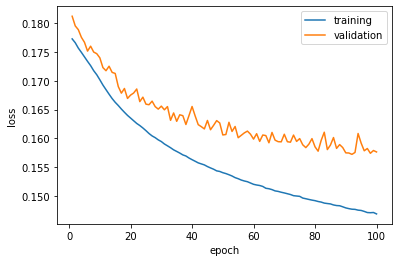

In [16]:
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [17]:
import numpy as np
predictions=model.predict([[0.0864    , 0.16793333, 0.29573333, 0.57673333, 0.26666667,
       0.66666667, 0.16      , 0.02733333]])
np.set_printoptions(suppress=True)
print(predictions*1000)
model.save("my_model")


[[ 59.493572  22.238844  -5.163856 -42.692184  29.24858 ]]
INFO:tensorflow:Assets written to: my_model\assets


In [19]:
import numpy as np
p=np.array([12.96,25.19,44.36,86.51,40,100,24,4.1])
p/150

array([0.0864    , 0.16793333, 0.29573333, 0.57673333, 0.26666667,
       0.66666667, 0.16      , 0.02733333])

In [ ]:
reconstructed_model = keras.models.load_model("my_model")
predictions=reconstructed_model.predict([[0.0864    , 0.16793333, 0.29573333, 0.57673333, 0.26666667,
       0.66666667, 0.16      , 0.02733333]])
np.set_printoptions(suppress=True)
print(predictions*1000)